In [1]:
import nltk
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nanda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
non_toxic = pd.read_csv('topic_key_wordsrecords_NonToxic.csv', index_col=0) #don't add index col since already have
mod_toxic = pd.read_csv('topic_key_wordsrecords_Moderate.csv', index_col=0)
severe_toxic = pd.read_csv('topic_key_wordsrecords_Severe.csv', index_col=0)
#comment_text - original comment
#cleaned_text - after data cleaning
#slightly_cleaned - after partial data cleaning, never remove punctuations and capitalisation

In [3]:
non_toxic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Slightly Cleaned,Comment Text
0,0,0.0,0.781002,"see, test, call, thank, make, think, dick, goo...",charge happy catch,`` : ) No charge . Happy I be there to catch i...,""" \r\n : ) No charge. Happy I was there to cat..."
1,1,2.0,0.754487,"fuck, nigga, get, idiot, think, mass, say, yea...",ship island cut two hurricane camille,: Ship Island be cut in two by Hurricane Camil...,: Ship Island was cut in two by Hurricane Cami...
2,2,5.0,0.873735,"say, think, see, make, get, page, article, dis...",think add paragraph crusade communism fascismn...,I think we should add paragraph on 1.Crusades ...,I think we should add paragraphs on \r\n\r\n ...
3,3,1.0,0.641297,"ball, thank, redirect, cucks_cuck, make, say, ...",welcome alll user let fill page fuckin jocular...,welcome ! alll user ! let fill this page with ...,welcome ! alll users! lets fill this page with...
4,4,5.0,0.853994,"say, think, see, make, get, page, article, dis...",cover civilian kill particular way,and just cover civilian kill in a particular way,and just covering civilians killed in a partic...


In [4]:
non_toxic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7568 entries, 0 to 7567
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Document_No         7568 non-null   int64  
 1   Dominant_Topic      7568 non-null   float64
 2   Topic_Perc_Contrib  7568 non-null   float64
 3   Keywords            7568 non-null   object 
 4   Text                7568 non-null   object 
 5   Slightly Cleaned    7568 non-null   object 
 6   Comment Text        7568 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 473.0+ KB


In [5]:
mod_toxic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6271 entries, 0 to 6270
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Document_No         6271 non-null   int64  
 1   Dominant_Topic      6271 non-null   float64
 2   Topic_Perc_Contrib  6271 non-null   float64
 3   Keywords            6271 non-null   object 
 4   Text                6271 non-null   object 
 5   Slightly Cleaned    6271 non-null   object 
 6   Comment Text        6271 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 391.9+ KB


In [6]:
severe_toxic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Document_No         54 non-null     int64  
 1   Dominant_Topic      54 non-null     float64
 2   Topic_Perc_Contrib  54 non-null     float64
 3   Keywords            54 non-null     object 
 4   Text                54 non-null     object 
 5   Slightly Cleaned    54 non-null     object 
 6   Comment Text        54 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.4+ KB


In [3]:
import sys

#To handle float object has no attribute encode error
def maybe_utf8(s):
    if isinstance(s, int):
        # s can be also an int for ex messages count
        return str(s)
    if isinstance(s, float):
        # s can be also a float for message rate
        return str(s)
    if sys.version_info[0] == 3:
        # It will have an encoding, which Python will respect
        return s
    else:
        # It won't have an encoding, and Python will pick ASCII by default
        return s.encode('utf-8')

In [8]:
non_toxic.head(2)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Slightly Cleaned,Comment Text
0,0,0.0,0.781002,"see, test, call, thank, make, think, dick, goo...",charge happy catch,`` : ) No charge . Happy I be there to catch i...,""" \r\n : ) No charge. Happy I was there to cat..."
1,1,2.0,0.754487,"fuck, nigga, get, idiot, think, mass, say, yea...",ship island cut two hurricane camille,: Ship Island be cut in two by Hurricane Camil...,: Ship Island was cut in two by Hurricane Cami...


In [4]:
non_toxic['Text'] = non_toxic['Text'].apply(maybe_utf8)
non_toxic['Slightly Cleaned'] = non_toxic['Slightly Cleaned'].apply(maybe_utf8)

mod_toxic['Text'] = mod_toxic['Text'].apply(maybe_utf8)
mod_toxic['Slightly Cleaned'] = mod_toxic['Slightly Cleaned'].apply(maybe_utf8)

severe_toxic['Text'] = severe_toxic['Text'].apply(maybe_utf8)
severe_toxic['Slightly Cleaned'] = severe_toxic['Slightly Cleaned'].apply(maybe_utf8)

# df['cleaned_text'] = df['cleaned_text'].apply(maybe_utf8)
# df['slightly_cleaned'] = df['slightly_cleaned'].apply(maybe_utf8)

In [10]:
# non_toxic.head()

<h4>positive sentiment : (compound score >= 0.05)
<h4>neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
<h4>negative sentiment : (compound score <= -0.05)
<h4>compound score is computed by normalising the above scores.

In [5]:
#Define function to return polarity based on scores
def format_output(output_dict):
    polarity = "neutral"
    
    if(output_dict['compound']>= 0.05):
        polarity = "positive"
    elif(output_dict['compound']<= -0.05):
        polarity = "negative"
        
    return polarity

def predict_sentiment_score(text): #compound score
    output_dict =  sent_analyzer.polarity_scores(text)
    return output_dict['compound']

def predict_sentiment(text):
    output_dict =  sent_analyzer.polarity_scores(text)
    return format_output(output_dict)


# Run the predictions

# 1. Cleaned Text
# Non-toxic
non_toxic["sentiment_cleaned_text"] = non_toxic["Text"].apply(predict_sentiment)
non_toxic["sentiment_score_cleaned_text"] = non_toxic["Text"].apply(predict_sentiment_score)

# Moderately toxic
mod_toxic["sentiment_cleaned_text"] = mod_toxic["Text"].apply(predict_sentiment)
mod_toxic["sentiment_score_cleaned_text"] = mod_toxic["Text"].apply(predict_sentiment_score)

# Severe toxic
severe_toxic["sentiment_cleaned_text"] = severe_toxic["Text"].apply(predict_sentiment)
severe_toxic["sentiment_score_cleaned_text"] = severe_toxic["Text"].apply(predict_sentiment_score)

# df["sentiment_cleaned_text"] = df["cleaned_text"].apply(predict_sentiment)
# df["sentiment_score_cleaned_text"] = df["cleaned_text"].apply(predict_sentiment_score)

# 2. Slightly Cleaned Text
# Non-toxic
non_toxic["sentiment_slightly_cleaned"] = non_toxic["Slightly Cleaned"].apply(predict_sentiment)
non_toxic["sentiment_score_slightly_cleaned"] = non_toxic["Slightly Cleaned"].apply(predict_sentiment_score)

# Moderately toxic
mod_toxic["sentiment_slightly_cleaned"] = mod_toxic["Slightly Cleaned"].apply(predict_sentiment)
mod_toxic["sentiment_score_slightly_cleaned"] = mod_toxic["Slightly Cleaned"].apply(predict_sentiment_score)

# Severe toxic
severe_toxic["sentiment_slightly_cleaned"] = severe_toxic["Slightly Cleaned"].apply(predict_sentiment)
severe_toxic["sentiment_score_slightly_cleaned"] = severe_toxic["Slightly Cleaned"].apply(predict_sentiment_score)

# df["sentiment_slightly_cleaned"] = df["slightly_cleaned"].apply(predict_sentiment)
# df["sentiment_score_slightly_cleaned"] = df["slightly_cleaned"].apply(predict_sentiment_score)

In [12]:
# Show 5 random rows of the data
non_toxic.sample(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Slightly Cleaned,Comment Text,sentiment_cleaned_text,sentiment_score_cleaned_text,sentiment_slightly_cleaned,sentiment_score_slightly_cleaned
5855,5855,1.0,0.439919,"ball, thank, redirect, cucks_cuck, make, say, ...",wikepidia god dam boring aaaahhhhhhhh,this wikepidia be so god dam bore aaaahhhhhhhh,this wikepidia is so god dam boring aaaahhhhhhhh,negative,-0.0516,positive,0.1224
6912,6912,2.0,0.890515,"fuck, nigga, get, idiot, think, mass, say, yea...",nigga yhe plug nigga get homies sellin drug ni...,I be that nigga with yhe plug I be that nigga ...,im that nigga with yhe plugs im that nigga who...,positive,0.3612,positive,0.3612
7229,7229,4.0,0.781021,"gay, sex_sex, use, go, think, porn, anal, give...",group sex position,== Group sex position ==,== Group sex positions ==,neutral,0.0000,neutral,0.0000
1659,1659,3.0,0.687527,"edit, page, wikipedia, make, article, source, ...",go long past overview outsider point view read...,`` : : : :This have go long past an overview ....,""" \r\n\r\n ::::This has gone long past an over...",positive,0.2551,negative,-0.9046
2664,2664,7.0,0.499282,"fuck, shit, go, penis, say, cunt, get, care, b...",force marriage debt bondage sex tourism child ...,"Forced marriage ] ] , Debt bondage , Sex touri...","Forced marriage]], Debt bondage, Sex tourism, ...",negative,-0.9100,negative,-0.9382


In [6]:
#Find comments with different SENTIMENTS between cleaned_text and slightly_cleaned
non_toxic_diff = non_toxic.loc[~(non_toxic['sentiment_cleaned_text'] == non_toxic['sentiment_slightly_cleaned'])]
mod_toxic_diff = mod_toxic.loc[~(mod_toxic['sentiment_cleaned_text'] == mod_toxic['sentiment_slightly_cleaned'])]
severe_toxic_diff = severe_toxic.loc[~(severe_toxic['sentiment_cleaned_text'] == severe_toxic['sentiment_slightly_cleaned'])]
# df_diff_sentiment = df.loc[~(df['sentiment_cleaned_text'] == df['sentiment_slightly_cleaned'])]

#Find comments with different SENTIMENT SCORES between cleaned_text and slightly_cleaned
non_toxic_diff_score = non_toxic.loc[~(non_toxic['sentiment_score_cleaned_text'] == non_toxic['sentiment_score_slightly_cleaned'])]
mod_toxic_diff_score = mod_toxic.loc[~(mod_toxic['sentiment_score_cleaned_text'] == mod_toxic['sentiment_score_slightly_cleaned'])]
severe_toxic_diff_score = severe_toxic.loc[~(severe_toxic['sentiment_score_cleaned_text'] == severe_toxic['sentiment_score_slightly_cleaned'])]
# df_diff_sentiment_score = df.loc[~(df['sentiment_score_cleaned_text'] == df['sentiment_score_slightly_cleaned'])]

In [14]:
non_toxic_diff.sample(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Slightly Cleaned,Comment Text,sentiment_cleaned_text,sentiment_score_cleaned_text,sentiment_slightly_cleaned,sentiment_score_slightly_cleaned
395,395,1.0,0.558145,"ball, thank, redirect, cucks_cuck, make, say, ...",oppose bgnpcgn list kharkiv approve variant co...,`` * Oppose . BGN/PCGN list `` '' Kharkiv '' '...,""" \r\n *Oppose. BGN/PCGN lists """"Kharkiv"""" as ...",positive,0.5719,negative,-0.1440
5543,5543,3.0,0.938611,"edit, page, wikipedia, make, article, source, ...",fan brazil think phenomenon existence million ...,== Fans in Brazil == I think the phenomenon of...,== Fans in Brazil == \r\n\r\n I think the phen...,positive,0.1027,negative,-0.2263
4116,4116,3.0,0.754360,"edit, page, wikipedia, make, article, source, ...",herod timeline timeline herod would put massac...,== Herod Timeline == The timeline at Herod wou...,== Herod Timeline == \r\n\r\n The timeline at ...,positive,0.7579,negative,-0.2249
2187,2187,3.0,0.890456,"edit, page, wikipedia, make, article, source, ...",july utc talk complete rubbish fact hide behin...,July 2011 ( UTC ) : : : : : Your talk complete...,July 2011 (UTC) \r\n\r\n :::::Your talking com...,positive,0.2500,negative,-0.4512
7101,7101,5.0,0.538174,"say, think, see, make, get, page, article, dis...",second para misleadingincorrect lot mislead in...,`` == Second Para Misleading/Incorrect == Ther...,"""== Second Para Misleading/Incorrect == \r\n T...",positive,0.2960,negative,-0.6361


In [15]:
pd.set_option('display.max_colwidth', None) #to show all information in dataframe column instead of truncated version

In [16]:
#Sentiment Distribution

#Non-Toxic
print(non_toxic['sentiment_cleaned_text'].value_counts())
print(non_toxic['sentiment_slightly_cleaned'].value_counts())

negative    2841
positive    2816
neutral     1911
Name: sentiment_cleaned_text, dtype: int64
negative    3017
positive    2705
neutral     1846
Name: sentiment_slightly_cleaned, dtype: int64


In [17]:
#Moderate Toxic
print(mod_toxic['sentiment_cleaned_text'].value_counts())
print(mod_toxic['sentiment_slightly_cleaned'].value_counts())

positive    3385
negative    2200
neutral      686
Name: sentiment_cleaned_text, dtype: int64
positive    3229
negative    2380
neutral      662
Name: sentiment_slightly_cleaned, dtype: int64


In [18]:
#Severe Toxic
print(severe_toxic['sentiment_cleaned_text'].value_counts())
print(severe_toxic['sentiment_slightly_cleaned'].value_counts())

positive    25
negative    17
neutral     12
Name: sentiment_cleaned_text, dtype: int64
positive    23
negative    19
neutral     12
Name: sentiment_slightly_cleaned, dtype: int64


In [49]:
print(non_toxic_diff[non_toxic_diff['Document_No']==7349]['Text'])
print("-----------------------------------------------------")
print(non_toxic_diff[non_toxic_diff['Document_No']==7349]['Slightly Cleaned'])
print("-----------------------------------------------------")
print(non_toxic_diff[non_toxic_diff['Document_No']==7349]['Comment Text'])
print("-----------------------------------------------------")
print(non_toxic_diff[non_toxic_diff['Document_No']==7349]['sentiment_cleaned_text'])
print("-----------------------------------------------------")
print(non_toxic_diff[non_toxic_diff['Document_No']==7349]['sentiment_slightly_cleaned'])

# Slightly cleaned sentiment is more accurate

7349    care conceal ip address want post opinion think worth less sack wet asshole care little think bother tell
Name: Text, dtype: object
-----------------------------------------------------
7349    Do n't care about conceal my IP address . Just want to post up an opinion , and here it be : I think you be worth less than a sack of wet asshole . And I care so little about what you think , I will not bother to tell you why .
Name: Slightly Cleaned, dtype: object
-----------------------------------------------------
7349    Don't care about concealing my IP address. \r\n Just wanted to post up an opinion, and here it is: \r\n I think you are worth less than a sack of wet assholes. \r\n And I care so little about what you think, I won't bother to tell you why.
Name: Comment Text, dtype: object
-----------------------------------------------------
7349    positive
Name: sentiment_cleaned_text, dtype: object
-----------------------------------------------------
7349    negative
Name: sent

In [50]:
print(non_toxic_diff[non_toxic_diff['Document_No']==436]['Text'])
print("-----------------------------------------------------")
print(non_toxic_diff[non_toxic_diff['Document_No']==436]['Slightly Cleaned'])
print("-----------------------------------------------------")
print(non_toxic_diff[non_toxic_diff['Document_No']==436]['Comment Text'])
print("-----------------------------------------------------")
print(non_toxic_diff[non_toxic_diff['Document_No']==436]['sentiment_cleaned_text'])
print("-----------------------------------------------------")
print(non_toxic_diff[non_toxic_diff['Document_No']==436]['sentiment_slightly_cleaned'])

# Slightly cleaned sentiment is more accurate

436    right behave way behave
Name: Text, dtype: object
-----------------------------------------------------
436    You have no right to behave the way you be behave .
Name: Slightly Cleaned, dtype: object
-----------------------------------------------------
436    You have no right to behave the way you are behaving.
Name: Comment Text, dtype: object
-----------------------------------------------------
436    neutral
Name: sentiment_cleaned_text, dtype: object
-----------------------------------------------------
436    negative
Name: sentiment_slightly_cleaned, dtype: object


In [19]:
mod_toxic_diff.sample(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Slightly Cleaned,Comment Text,sentiment_cleaned_text,sentiment_score_cleaned_text,sentiment_slightly_cleaned,sentiment_score_slightly_cleaned
2451,2451,1.0,0.629838,"say, article, know, time, think, make, people, see, wikipedia, read",exrat insist criterion eliminate possibility include historical person acceptable delete properly source citation vague proposition acceptable source state person gay whatever put article discuss simply erase discussion acceptable call scholarship really care think norton activist focus rs opinion also basically irrelevant encyclopaedia actually come historian discus paulinus sexuality guest,": : : ExRat insist on criterion which eliminate any possibility of include any historical person . that be not acceptable . Deleting properly source citation , for vague proposition be not acceptable . if you have a SOURCE which STATES that a person be not gay or whatever , put that in their article so it can be discuss . Simply erase any discussion of it , be not acceptable . That be call scholarship . I do not really care if you think Norton be or be an activist . That be OR . I be focus on him as an RS and your opinion that he be not , be also OR . it be basically irrelevant to an encyclopaedia . Now if you can actually come up with a historian who discuss Paulinus ' sexuality than be my guest . That what we be all about .",":::ExRat insists on criteria which eliminate any possibility of including any historical persons. That's not acceptable. Deleting properly sourced citation, for vague propositions isn't acceptable. if you have a SOURCE which STATES that a person was not gay or whatever, put that in their article so it can be discussed. Simply erasing any discussion of it, is not acceptable. That is called scholarship. I don't really care if you think Norton was or is an activist. That is OR. I'm focusing on him as an RS and your opinion that he is not, is also OR. It's basically irrelevant to an encyclopaedia. Now if you can actually come up with a historian who discusses Paulinus' sexuality than be my guest. That what we're all about.",positive,0.8399,negative,-0.7981
2976,2976,1.0,0.780785,"say, article, know, time, think, make, people, see, wikipedia, read",steth clearly breach incivility convention case good remove chiropractic becksteadchristianson line interested put article endless chiropractic tantrum,: :Steth . You be clearly in breach of incivility convention . You be do your case no good at all . I have remove chiropractic from the Beckstead/Christianson line . I be not interested in put this article through endless chiropractic tantrum .,::Steth. You are clearly in breach of incivility conventions. You are doing your case no good at all. I have removed chiropractic from the Beckstead/Christianson line. I am not interested in putting this article through endless chiropractic tantrums.,positive,0.6705,negative,-0.1675
1104,1104,7.0,0.898746,"article, know, make, think, even, people, write, wikipedia, do, go",dont asssume know ridiculous comment barely warrant response,: Do n't ASS-sume what I know . Your ridiculous comment barely warrant a response .,:Don't ASS-sume what I know. Your ridiculous comments barely warrant a response.,positive,0.2755,negative,-0.3612
6140,6140,7.0,0.918550,"article, know, make, think, even, people, write, wikipedia, do, go",didnt write anything rude jus tpointing learn also guess personal attack something also like,I didnt write anything rude to you jus tpointing out that you can learn also . but i guess personal attack be something YOU also like,I didnt write anything rude to you jus tpointing out that you can learn also. but i guess personal attacks are something YOU also like,positive,0.2216,neutral,-0.0413
4637,4637,1.0,0.657578,"say, article, know, time, think, make, people, see, wikipedia, read",honest law seem pov attach basically say youre stupid agree think would better change principle supply 

In [51]:
print(mod_toxic_diff[mod_toxic_diff['Document_No']==602]['Text'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==602]['Slightly Cleaned'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==602]['Comment Text'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==602]['sentiment_cleaned_text'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==602]['sentiment_slightly_cleaned'])

# Slightly cleaned sentiment is more accurate

602    block friend share opinion gay comment freak life live mom suck beyond belief allbut ya know whati think gon na agree himyou suck definately right gay queer go make mom ya big porker hate antandruswtf kind name antandrusi mean could come good name right top headlets see well good one would gaybo gayporker iamaqueergay ilivewithmymomandiamgayandproud hate
Name: Text, dtype: object
-----------------------------------------------------
602    Why do you block my friend , all he be do be share his opinion about HOW GAY YOU ARE ! ! ! All he do be comment about how you have NO FREAKING LIFE , AND HOW YOU LIVE WITH YOUR MOM , AND HOW YOU SUCK BEYOND BELIEF ! ! ! THAT WAS ALL ... BUT YA KNOW WHAT ... I THINK IM GON NA HAVE TO AGREE WITH HIM ... YOU SUCK ! ! ! HE IS DEFINATELY RIGHT , YOU ARE GAY , AND A QUEER ! ! ! GO MAKE OUT WITH YOUR MOM , YA BIG PORKER ! ! ! ! I HATE YOU ANTANDRUS ... WTF KIND OF A NAME IS ANTANDRUS ... I MEAN I COULD COME UP WITH 10 BETTER NAMES RIGHT OFF THE TOP O

In [55]:
print(mod_toxic_diff[mod_toxic_diff['Document_No']==1104]['Text'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==1104]['Slightly Cleaned'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==1104]['Comment Text'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==1104]['sentiment_cleaned_text'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==1104]['sentiment_slightly_cleaned'])

# Cleaned text sentiment is more accurate

1104    dont asssume know ridiculous comment barely warrant response
Name: Text, dtype: object
-----------------------------------------------------
1104    : Do n't ASS-sume what I know . Your ridiculous comment barely warrant a response .
Name: Slightly Cleaned, dtype: object
-----------------------------------------------------
1104    :Don't ASS-sume what I know.  Your ridiculous comments barely warrant a response.
Name: Comment Text, dtype: object
-----------------------------------------------------
1104    positive
Name: sentiment_cleaned_text, dtype: object
-----------------------------------------------------
1104    negative
Name: sentiment_slightly_cleaned, dtype: object


In [54]:
print(mod_toxic_diff[mod_toxic_diff['Document_No']==3071]['Text'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==3071]['Slightly Cleaned'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==3071]['Comment Text'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==3071]['sentiment_cleaned_text'])
print("-----------------------------------------------------")
print(mod_toxic_diff[mod_toxic_diff['Document_No']==3071]['sentiment_slightly_cleaned'])

# Slightly cleaned sentiment is more accurate

3071    government source ekograf son bistell government source valiable sourceyoure nothing insane racist like kahnjohn
Name: Text, dtype: object
-----------------------------------------------------
3071    == Government source == EkoGraf , son a bi ( ) s , tell me why government source be not not a valiable source ? ? You 're be nothing but insane and racist like Kahnjohn27 ! ! ! ! ! ! ! !
Name: Slightly Cleaned, dtype: object
-----------------------------------------------------
3071    == Government source == \r\n\r\n EkoGraf ,son a bi()s,tell me why government's source aren't not a valiable source??You're are nothing but insane and racist like Kahnjohn27!!!!!!!!
Name: Comment Text, dtype: object
-----------------------------------------------------
3071    positive
Name: sentiment_cleaned_text, dtype: object
-----------------------------------------------------
3071    negative
Name: sentiment_slightly_cleaned, dtype: object


In [23]:
severe_toxic_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 14 to 51
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Document_No                       3 non-null      int64  
 1   Dominant_Topic                    3 non-null      float64
 2   Topic_Perc_Contrib                3 non-null      float64
 3   Keywords                          3 non-null      object 
 4   Text                              3 non-null      object 
 5   Slightly Cleaned                  3 non-null      object 
 6   Comment Text                      3 non-null      object 
 7   sentiment_cleaned_text            3 non-null      object 
 8   sentiment_score_cleaned_text      3 non-null      float64
 9   sentiment_slightly_cleaned        3 non-null      object 
 10  sentiment_score_slightly_cleaned  3 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 288.0+ bytes


In [24]:
severe_toxic_diff.head(3)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Slightly Cleaned,Comment Text,sentiment_cleaned_text,sentiment_score_cleaned_text,sentiment_slightly_cleaned,sentiment_score_slightly_cleaned
14,14,4.0,0.974997,"article, theory, add, decline, link, machine, assembly, fall, use, word",chauvinist nazists polish lithuanian nazi discus change article truly belarusian slavic city intrigue lithuanians stalin capital republic belarus stop note take note seriously consider anyone nazists chauvinists however fact vilnius belarusian city capital belarusian state century,"== NO to all chauvinist and nazists == why do you both polish and lithuanian nazi discus and change article about truly our , Belarusian , Slavic city ? If not for the intrigue of some lithuanian and stalin it should capital of Republic of Belarus now ! So stop both ! note : do not take my note too seriously . i do not consider anyone here as nazists and chauvinist , however it be the fact that Vilnius be Belarusian city , because of be the capital of Belarusian state for century .","== NO to all chauvinists and nazists == \r\n\r\n why do you both polish and lithuanian nazi discuss and change article about truly our, Belarusian, Slavic city? If not for the intrigues of some lithuanians and stalin it should capital of Republic of Belarus now! So stop both! \r\n\r\n \r\n note: don't take my note too seriously. i don't consider anyone here as nazists and chauvinists, however it's the fact that Vilnius is Belarusian city, because of being the capital of Belarusian state for centuries.",neutral,0.0000,negative,-0.5873
22,22,6.0,0.765381,"vandalizer, cuntnlu, nlu, article, cunt, belarusian, jem, assembly, link, nazist",ohhbrittany kaim scar gosh please lock jem article life go jem article protect loser brittany ka,"Ohh , Brittany Ka , I 'm so scared ! ! ! Gosh please do not lock the Jem article ! ! ! How will life go on if the Jem article be protect ? ? Your such a loser Brittany Ka .","Ohh,Brittany Ka,I'm so scared!!! Gosh please don't lock the Jem article!!! How will life go on if the Jem article is protected?? Your such a loser Brittany Ka.",positive,0.1280,negative,-0.6711
51,51,2.0,0.957140,"article, section, first, topic, viewpoint, silly, comment, agree, subject, claim",silly article seem like article worthy encyclopedia article nickname base arbitrary criterion never universally agree upon first line article underscore silly delete,== Silly article == This do not seem like an article worthy of an encyclopedia . An article about an nickname base on arbitrary criterion that can never be universally agree upon ? The very first line of this article underscore how silly it be . This should be delete .,== Silly article == \r\n\r\n This does not seem like an article worthy of an encyclopedia. An article about an nickname based on arbitrary criteria that can never be universally agreed upon? The very first line of this article underscores how silly it is. This should be deleted.,positive,0.5408,neutral,-0.0310


In [56]:
print(severe_toxic_diff[severe_toxic_diff['Document_No']==22]['Text'])
print("-----------------------------------------------------")
print(severe_toxic_diff[severe_toxic_diff['Document_No']==22]['Slightly Cleaned'])
print("-----------------------------------------------------")
print(severe_toxic_diff[severe_toxic_diff['Document_No']==22]['Comment Text'])
print("-----------------------------------------------------")
print(severe_toxic_diff[severe_toxic_diff['Document_No']==22]['sentiment_cleaned_text'])
print("-----------------------------------------------------")
print(severe_toxic_diff[severe_toxic_diff['Document_No']==22]['sentiment_slightly_cleaned'])

# Slightly cleaned sentiment is more accurate

22    ohhbrittany kaim scar gosh please lock jem article life go jem article protect loser brittany ka
Name: Text, dtype: object
-----------------------------------------------------
22    Ohh , Brittany Ka , I 'm so scared ! ! ! Gosh please do not lock the Jem article ! ! ! How will life go on if the Jem article be protect ? ? Your such a loser Brittany Ka .
Name: Slightly Cleaned, dtype: object
-----------------------------------------------------
22    Ohh,Brittany Ka,I'm so scared!!! Gosh please don't lock the Jem article!!! How will life go on if the Jem article is protected?? Your such a loser Brittany Ka.
Name: Comment Text, dtype: object
-----------------------------------------------------
22    positive
Name: sentiment_cleaned_text, dtype: object
-----------------------------------------------------
22    negative
Name: sentiment_slightly_cleaned, dtype: object


In [57]:
print(severe_toxic_diff[severe_toxic_diff['Document_No']==51]['Text'])
print("-----------------------------------------------------")
print(severe_toxic_diff[severe_toxic_diff['Document_No']==51]['Slightly Cleaned'])
print("-----------------------------------------------------")
print(severe_toxic_diff[severe_toxic_diff['Document_No']==51]['Comment Text'])
print("-----------------------------------------------------")
print(severe_toxic_diff[severe_toxic_diff['Document_No']==51]['sentiment_cleaned_text'])
print("-----------------------------------------------------")
print(severe_toxic_diff[severe_toxic_diff['Document_No']==51]['sentiment_slightly_cleaned'])

# Slightly cleaned sentiment is more accurate

51    silly article seem like article worthy encyclopedia article nickname base arbitrary criterion never universally agree upon first line article underscore silly delete
Name: Text, dtype: object
-----------------------------------------------------
51    == Silly article == This do not seem like an article worthy of an encyclopedia . An article about an nickname base on arbitrary criterion that can never be universally agree upon ? The very first line of this article underscore how silly it be . This should be delete .
Name: Slightly Cleaned, dtype: object
-----------------------------------------------------
51    == Silly article  == \r\n\r\n This does not seem like an article worthy of an encyclopedia. An article about an nickname based on arbitrary criteria that can never be universally agreed upon?  The very first line of this article underscores how silly it is.  This should be deleted.
Name: Comment Text, dtype: object
-----------------------------------------------------
51 

<h4>Conclusion: Slightly cleaned text seems to return a larger proportion of accurate sentiments using VADER as compared to fully cleaned text. Hence, we can derive that punctuation and text styling in the form of capitalisation adds information to the analysis as it represents more elaborate emotions. As such, it is not surprising to see that the sentiments obtained from the slightly cleaned text are more accurate as certain textual features also contribute to the meaning of the text.

In [27]:
#Percentage of comments with different sentiments between cleaned_text and slightly_cleaned
print("Non-toxic: " + str(round(len(non_toxic_diff)/len(non_toxic)*100, 2)) + "% of comments have different sentiments")
print("Moderately toxic: " + str(round(len(mod_toxic_diff)/len(mod_toxic)*100, 2)) + "% of comments have different sentiments")
print("Severe toxic: " + str(round(len(severe_toxic_diff)/len(severe_toxic)*100, 2)) + "% of comments have different sentiments")
# print(str(round(len(df_diff_sentiment)/len(df)*100, 2)) + "% of comments have different sentiments")

#Percentage of comments with different sentiment scores between cleaned_text and slightly_cleaned
print("Non-toxic: " + str(round(len(non_toxic_diff_score)/len(non_toxic)*100, 2)) + "% of comments have different sentiment scores")
print("Moderately toxic: " + str(round(len(mod_toxic_diff_score)/len(mod_toxic)*100, 2)) + "% of comments have different sentiment scores")
print("Severe toxic: " + str(round(len(severe_toxic_diff_score)/len(severe_toxic)*100, 2)) + "% of comments have different sentiment scores")
# print(str(round(len(df_diff_sentiment_score)/len(df)*100, 2)) + "% of comments have different sentiment scores")

Non-toxic: 9.42% of comments have different sentiments
Moderately toxic: 11.59% of comments have different sentiments
Severe toxic: 5.56% of comments have different sentiments
Non-toxic: 47.4% of comments have different sentiment scores
Moderately toxic: 66.58% of comments have different sentiment scores
Severe toxic: 29.63% of comments have different sentiment scores


In [28]:
# def print_top_n_comments(df, data_column, number_of_rows):
#     if data_column=="sentiment_score_cleaned_text":
#         for index, row in df.nlargest(number_of_rows, data_column).iterrows():
#             print(f"Sentiment Score: {row[data_column]}, Comment: {row[2]}")
#             print("---------------------------------------------------")
#     else:
#         for index, row in df.nlargest(number_of_rows, data_column).iterrows():
#             print(f"Sentiment Score: {row[data_column]}, Comment: {row[6]}")
#             print("---------------------------------------------------")

In [29]:
#Top scoring comments in each type of sentiment
# print_top_n_comments(df, 'sentiment_score_cleaned_text', 5)

In [30]:
#Top scoring comments in each type of sentiment
# print_top_n_comments(df, 'sentiment_score_slightly_cleaned', 5)

<h4>Word Cloud use 'Text' instead of 'Slightly Cleaned' column as these are the key words of each comment. Capitalisations and punctuations shouldn't appear in the word cloud.

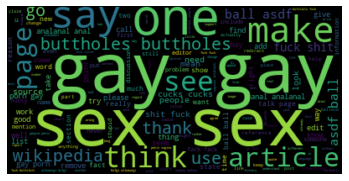

In [31]:
def plot_wordcloud(series, output_filename='wordcloud'):
    from wordcloud import WordCloud
    
    wordcloud = WordCloud().generate(' '.join(series.astype(str)))
    wordcloud.to_file(output_filename + '.png')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

plot_wordcloud(non_toxic['Text'],'non-toxic-wordcloud')
# plot_wordcloud(df['cleaned_text'],'cleaned-text-wordcloud')

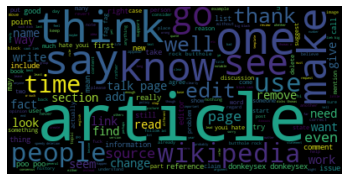

In [32]:
plot_wordcloud(mod_toxic['Text'],'mod-toxic-wordcloud')

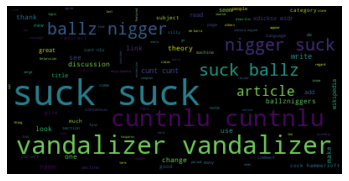

In [33]:
plot_wordcloud(severe_toxic['Text'],'severe-toxic-wordcloud')

In [34]:
# def plot_wordcloud_top_n(df, number_of_reviews, score_column, data_column, output_filename):
#     sliced_df = df.nlargest(number_of_reviews, score_column)
#     plot_wordcloud(sliced_df[data_column], output_filename)

In [35]:
#Positive, Negative, Neutral comments
# positive = df.loc[~(df['sentiment_cleaned_text'] == "positive")]
# negative = df.loc[~(df['sentiment_cleaned_text'] == "negative")]
# neutral = df.loc[~(df['sentiment_cleaned_text'] == "neutral")]

#Word Cloud for top 1400 (10%) of positive sentiments comments
# plot_wordcloud(positive['cleaned_text'],'cleaned-text-positive-wordcloud')
# plot_wordcloud_top_n(positive, 1400, 'sentiment_score_cleaned_text','cleaned_text','cleaned-text-positive-wordcloud')

In [36]:
#Word Cloud for top 1400 (10%) of negative sentiments comments
# plot_wordcloud(negative['cleaned_text'],'cleaned-text-negative-wordcloud')
# plot_wordcloud_top_n(negative, 1400, 'sentiment_score_cleaned_text','cleaned_text','cleaned-text-negative-wordcloud')

In [37]:
#Word Cloud for top 1400 (10%) of neutral sentiments comments
# plot_wordcloud(neutral['cleaned_text'],'cleaned-text-neutral-wordcloud')
# plot_wordcloud_top_n(neutral, 1400, 'sentiment_score_cleaned_text','cleaned_text','cleaned-text-neutral-wordcloud')

In [38]:
# def actual_polarity(x):
#     if x==0:
#         return 'neutral/positive'
#     else:
#         return 'negative'

# df['actual_polarity_severe_toxic'] = df['severe_toxic'].apply(actual_polarity)
# df['actual_polarity_toxic'] = df['toxic'].apply(actual_polarity)

#dont need right??????????????????????????

<h4>Generally, the difference in sentiments across all 3 categories seem to be averaged at aproximately 9%. As this is not a significantly large number, especially considering our sample size (quite large), the sentiments obtained from cleaned text and slightly cleaned text do not differ significantly.
<h4>However, as slightly cleaned text seems to return better sentiments than the cleaned text, we will be using the sentiments obtained from slightly cleaned text from here on to explore the correlation between topics and sentiments.

In [39]:
# Chi-Square Test (topic vs sentiment)
non_toxic_contigency = pd.crosstab(non_toxic['Dominant_Topic'], non_toxic['sentiment_cleaned_text']) 
non_toxic_contigency

sentiment_cleaned_text,negative,neutral,positive
Dominant_Topic,,,
0.0,196,185,214
1.0,143,277,158
2.0,166,151,124
3.0,927,456,1192
4.0,155,163,128
5.0,560,298,535
6.0,255,238,285
7.0,439,143,180


In [40]:
non_toxic_contigency_pct = pd.crosstab(non_toxic['Dominant_Topic'], non_toxic['sentiment_cleaned_text'], normalize='index')
non_toxic_contigency_pct

sentiment_cleaned_text,negative,neutral,positive
Dominant_Topic,,,
0.0,0.329412,0.310924,0.359664
1.0,0.247405,0.479239,0.273356
2.0,0.376417,0.342404,0.281179
3.0,0.360000,0.177087,0.462913
4.0,0.347534,0.365471,0.286996
5.0,0.402010,0.213927,0.384063
6.0,0.327763,0.305913,0.366324
7.0,0.576115,0.187664,0.236220


In [41]:
# Chi-Square Test (topic vs sentiment)
mod_toxic_contigency = pd.crosstab(mod_toxic['Dominant_Topic'], mod_toxic['sentiment_cleaned_text']) 
mod_toxic_contigency

sentiment_cleaned_text,negative,neutral,positive
Dominant_Topic,,,
0.0,104,23,178
1.0,560,109,606
2.0,401,207,1125
3.0,46,12,31
4.0,24,18,29
5.0,226,25,121
6.0,72,28,61
7.0,341,75,357
8.0,291,152,749


In [42]:
mod_toxic_contigency_pct = pd.crosstab(mod_toxic['Dominant_Topic'], mod_toxic['sentiment_cleaned_text'], normalize='index')
mod_toxic_contigency_pct

sentiment_cleaned_text,negative,neutral,positive
Dominant_Topic,,,
0.0,0.340984,0.075410,0.583607
1.0,0.439216,0.085490,0.475294
2.0,0.231391,0.119446,0.649163
3.0,0.516854,0.134831,0.348315
4.0,0.338028,0.253521,0.408451
5.0,0.607527,0.067204,0.325269
6.0,0.447205,0.173913,0.378882
7.0,0.441138,0.097025,0.461837
8.0,0.244128,0.127517,0.628356


In [43]:
# Chi-Square Test (topic vs sentiment)
severe_toxic_contigency = pd.crosstab(severe_toxic['Dominant_Topic'], severe_toxic['sentiment_cleaned_text']) 
severe_toxic_contigency

sentiment_cleaned_text,negative,neutral,positive
Dominant_Topic,,,
0.0,3,2,4
1.0,1,0,0
2.0,3,2,5
3.0,1,1,1
4.0,0,1,4
5.0,2,1,4
6.0,1,1,1
7.0,2,2,1
8.0,0,2,4


In [44]:
severe_toxic_contigency_pct = pd.crosstab(severe_toxic['Dominant_Topic'], severe_toxic['sentiment_cleaned_text'], normalize='index')
severe_toxic_contigency_pct

sentiment_cleaned_text,negative,neutral,positive
Dominant_Topic,,,
0.0,0.333333,0.222222,0.444444
1.0,1.000000,0.000000,0.000000
2.0,0.300000,0.200000,0.500000
3.0,0.333333,0.333333,0.333333
4.0,0.000000,0.200000,0.800000
5.0,0.285714,0.142857,0.571429
6.0,0.333333,0.333333,0.333333
7.0,0.400000,0.400000,0.200000
8.0,0.000000,0.333333,0.666667


In [45]:
# Chi-square test of independence
c1, p1, dof1, expected1 = chi2_contingency(non_toxic_contigency)
c2, p2, dof2, expected2 = chi2_contingency(mod_toxic_contigency)
c3, p3, dof3, expected3 = chi2_contingency(severe_toxic_contigency)

# Print the p-values
print(p1)
print(p2)
print(p3)

1.0991970739336262e-97
1.4313979781768577e-77
0.5962867968920782


In [46]:
# Interpret p-values
alpha = 0.05
def interpret_p(p):
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

interpret_p(p1)
interpret_p(p2)
interpret_p(p3)

Dependent (reject H0)
Dependent (reject H0)
Independent (H0 holds true)


<h4>As p1 and p2 are less than 0.05 (alpha), we reject the null hypothesis that topics and sentiments are independent. Thus, topics and sentiments are dependent and correlated.
<h4>As p3 is greater than 0.05 (alpha), we do not reject the null hypothesis. Thus, topics and sentiments are independent and correlation=0.

<h4>Hence, we can conclude that for non-toxic and moderately toxic comments, there is significant association between topics and sentiments, which means that there are certain topics that tend to be non-toxic and moderately toxic. However, we cannot say the same for severe toxic. For comments categorised as severely toxic, there is no fixed set of topics that are frequently identified as severely toxic. This suggests that for comments falling under this category, there may be a more diverse set of topics usually mentioned on Wikipedia. Further advanced learning models will have to be trained to enhance the insights gleaned so far to make it more customised to handling social media data. It can be used to further the efforts in content moderation by improving the identification of toxic comments and preventing them from being posted on social media platforms.